## OpenCV Video Tutorial

By: Jay Prajapati, Rohan Maan, Tommy Chang, Samer Charifa

In [4]:
# Connect to drive and change to required
# ENSURE YOU GIVE ALL THE PERMISSIONS WHILE CONNECTIONG
# YOUR GOOGLE DRIVE USING THS COMMAND
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [5]:
# Change the working directory
path_to_folder = "ENPM673/tutorials"
%cd /content/drive/My\ Drive/{path_to_folder}

/content/drive/My Drive/ENPM673/tutorials


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

### Reading Images

In [7]:
# Load an image
image = cv2.imread('assets/apple.jpeg')

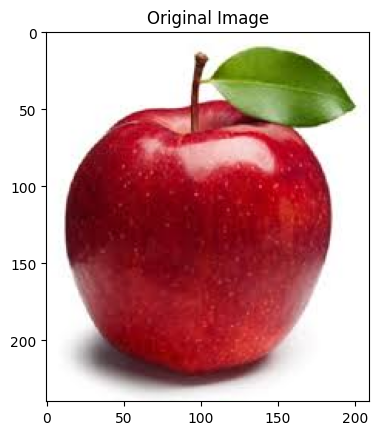

In [8]:
# Display the original image
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

### Reading Video

In [22]:
# Read a video
video_capture = cv2.VideoCapture('assets/road.mp4')

# Get video properties
frame_width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(video_capture.get(cv2.CAP_PROP_FPS))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output_video.mp4', fourcc, fps, (frame_width, frame_height))

# Read and save each frame
while True:
    ret, frame = video_capture.read()
    if not ret:
        break

    cv2.putText(
        img = frame,
        text = 'This is my text on the video',
        org = (60,130),
        fontFace = cv2.FONT_HERSHEY_SIMPLEX,
        fontScale = 1,
        color = (0, 0, 255),
        thickness = 2,
        lineType = cv2.LINE_AA
    )

    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

    out.write(frame)

# Release VideoCapture and VideoWriter objects
video_capture.release()
out.release()


### Displaying Video

In [29]:
import imageio
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
from IPython.display import HTML

# Function to display the video
def display_video(video):
    fig = plt.figure(figsize=(3,3))

    mov = []
    for i in range(len(video)):
        img = plt.imshow(video[i], animated=True)
        plt.axis('off')
        mov.append([img])

    #Animation creation
    anime = animation.ArtistAnimation(fig, mov, interval=50, repeat_delay=1000)
    plt.close()

    return anime

# Load video
video = imageio.mimread('output_video.mp4', memtest=False)

# Size adjustment (if necessary)
# video = [resize(frame, (256, 256))[..., :3] for frame in video]

# Inline video display in HTML5
HTML(display_video(video).to_html5_video())